# IMERG w/ XArray

Use h5netcdf and XArray to analayze IMERG file.
These are higher level apis (built on top of HDF5) that work well with Earth Science data
XArray understands "CF Conventions" (https://cfconventions.org/).  These are standard set of 
attributes and file orgranization that enable software to more intelligently work with earth science
data.

In [1]:
! pip install numpy==1.21.6

In [2]:
! pip install cftime

In [3]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

In [4]:
# Path to NetCDF/HDF5 file
# The "hdf5:/" prefix indicates it's an HSDS domain rather than a regular posix file
domain_path = "hdf5://shared/NASA/IMERG/3B-MO.MS.MRG.3IMERG.20210701-S000000-E235959.07.V06B.HDF5"

In [5]:
# load the dataset
# Note - xarray uses the term "dataset" to refer to what HDF5 users would call a file
# An HDF5 dataset is called a "variable". This can be a bit confusing!
# The engine parameter says to use the h5netcdf package.  In turn h5netcdf will use h5pyd
# when it sees the "hdf5://" prefix in the domain path
# XArray can relate datasets in a given group.  Use the group param to specify the
# group we are interested in
ds = xr.open_dataset(domain_path, group='/Grid', engine="h5netcdf")

In [6]:
# the standard representation of a dataset will show dimensions, coordinates, data, and attribute 
# components
ds

<xarray.Dataset>
Dimensions:                         (time: 1, lon: 3600, lat: 1800, latv: 2,
                                     lonv: 2, nv: 2)
Coordinates:
  * lat                             (lat) float32 -89.95 -89.85 ... 89.85 89.95
  * lon                             (lon) float32 -179.9 -179.9 ... 179.9 179.9
  * time                            (time) object 2021-07-01 00:00:00
Dimensions without coordinates: latv, lonv, nv
Data variables:
    gaugeRelativeWeighting          (time, lon, lat) float32 ...
    lat_bnds                        (lat, latv) float32 ...
    lon_bnds                        (lon, lonv) float32 ...
    precipitation                   (time, lon, lat) float32 ...
    precipitationQualityIndex       (time, lon, lat) float32 ...
    probabilityLiquidPrecipitation  (time, lon, lat) float32 ...
    randomError                     (time, lon, lat) float32 ...
    time_bnds                       (time, nv) object ...
Attributes:
    GridHeader:  BinMethod=ARITHMETIC_MEAN;\nRegistration=CENTER;\nLatitudeRe...

In [7]:
# pull out "precipitation" variable with dictionary syntax
precip = ds["precipitation"]
precip

<xarray.DataArray 'precipitation' (time: 1, lon: 3600, lat: 1800)>
[6480000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
  * time     (time) object 2021-07-01 00:00:00
Attributes:
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    units:             mm/hr
    CodeMissingValue:  -9999.9

In [8]:
# or by using dot notation
ds.precipitation

<xarray.DataArray 'precipitation' (time: 1, lon: 3600, lat: 1800)>
[6480000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
  * time     (time) object 2021-07-01 00:00:00
Attributes:
    DimensionNames:    time,lon,lat
    Units:             mm/hr
    units:             mm/hr
    CodeMissingValue:  -9999.9

In [9]:
# named dimensions
ds.precipitation.dims

('time', 'lon', 'lat')

In [10]:
# extracting coorindate variables from .coords
ds.coords["lon"]

<xarray.DataArray 'lon' (lon: 3600)>
array([-179.95, -179.85, -179.75, ...,  179.75,  179.85,  179.95],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
Attributes:
    DimensionNames:  lon
    Units:           degrees_east
    units:           degrees_east
    standard_name:   longitude
    LongName:        Longitude at the center of\n\t\t\t0.10 degree grid inter...
    bounds:          lon_bnds
    axis:            X

In [11]:
# .attrs is a dictionary that can contain arbitrary python objects. Much like with h5py or h5pyd
ds.precipitation.attrs

{'DimensionNames': 'time,lon,lat',
 'Units': 'mm/hr',
 'units': 'mm/hr',
 'CodeMissingValue': '-9999.9'}

In [12]:
# The data array is three-dimensional: time, lon, and lat coordinates
ds.precipitation.shape

(1, 3600, 1800)

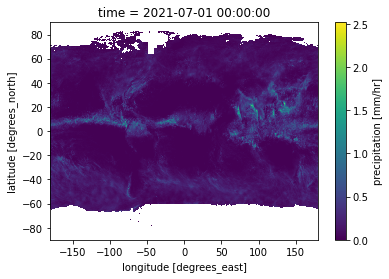

In [13]:
# Plotting methods are built into Xarray.
# Xarray uses it's mapping of dimensions to correctly setup
# plot axes and legend
# time=1 will plot the second time inde
ds.precipitation.isel(time=0).plot(x="lon")